## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet34_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.326, ECE: 0.047
Optimal temperature: 4.903
After temperature - NLL: 0.879, ECE: 0.464


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


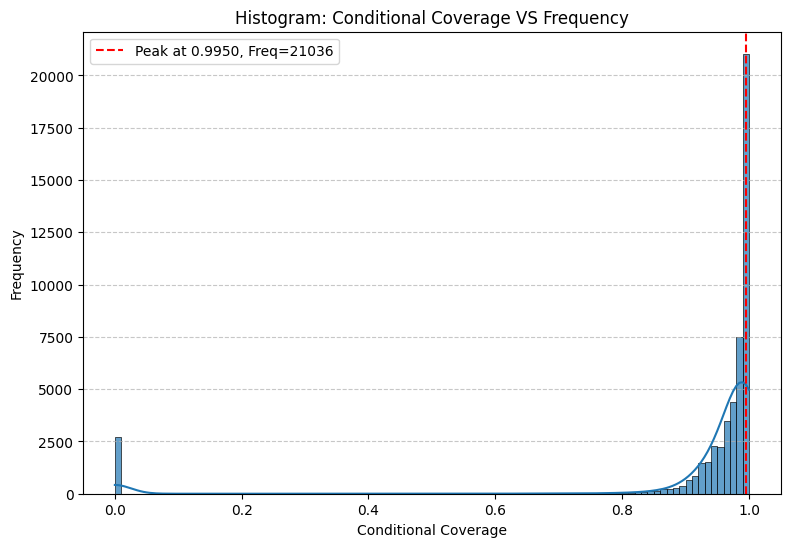

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9452 ± 0.0052
Final Average Real Probability: 0.9213 ± 0.0053


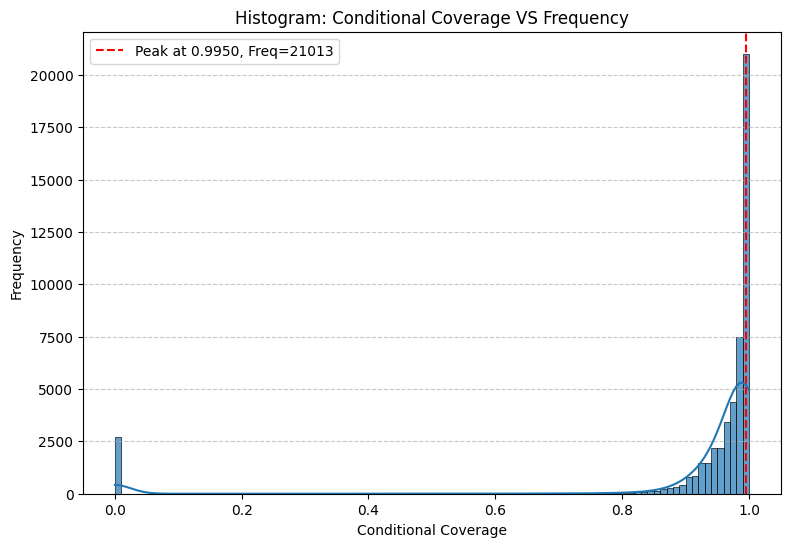

21013 (42.03%) samples reached the peak conditional coverage at 0.9950


In [5]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9336 ± 0.0027
Final Average Prediction Set Size: 0.97 ± 0.00
Final Average Coverage: 0.9502 ± 0.0027
Final Average Real Probability: 0.9140 ± 0.0025


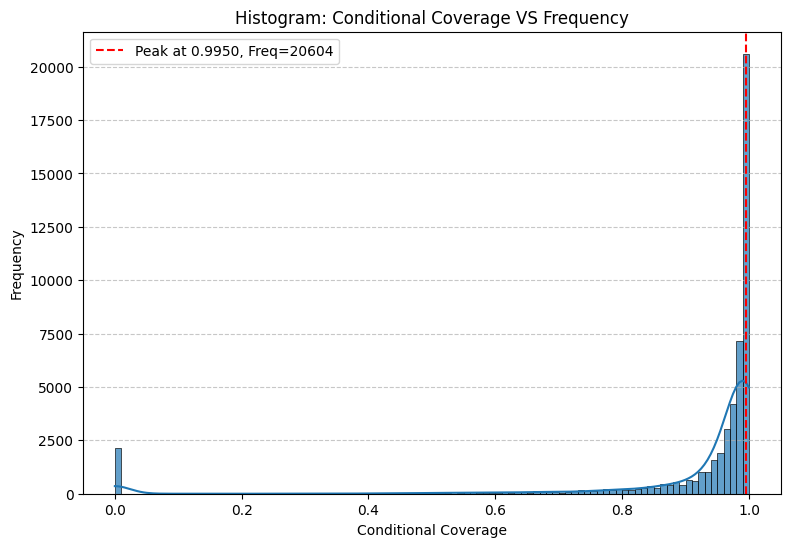

20604 (41.21%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)

## Model Test

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5256 ± 0.0030
Final Average Prediction Set Size: 1.56 ± 0.02
Final Average Coverage: 0.9472 ± 0.0032
Final Average Real Probability: 0.9196 ± 0.0037


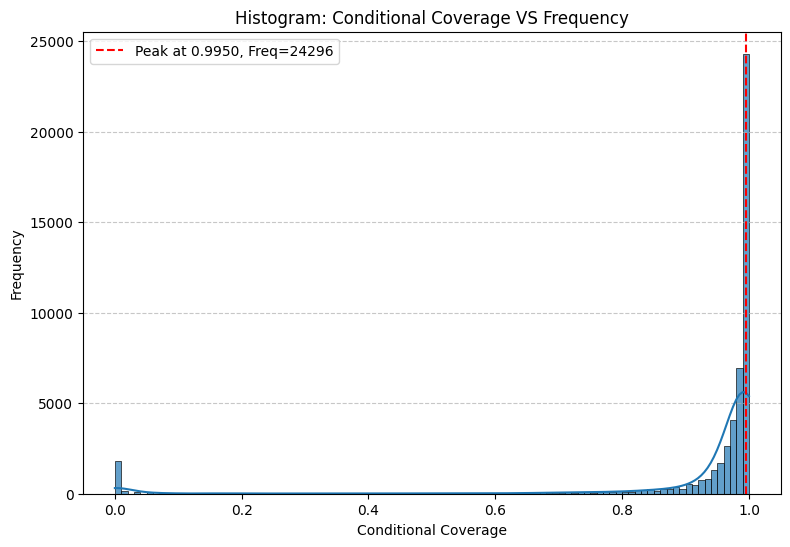

24296 (48.59%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5256 ± 0.0030
Final Average Prediction Set Size: 1.56 ± 0.02
Final Average Coverage: 0.9472 ± 0.0032
Final Average Real Probability: 0.9196 ± 0.0037


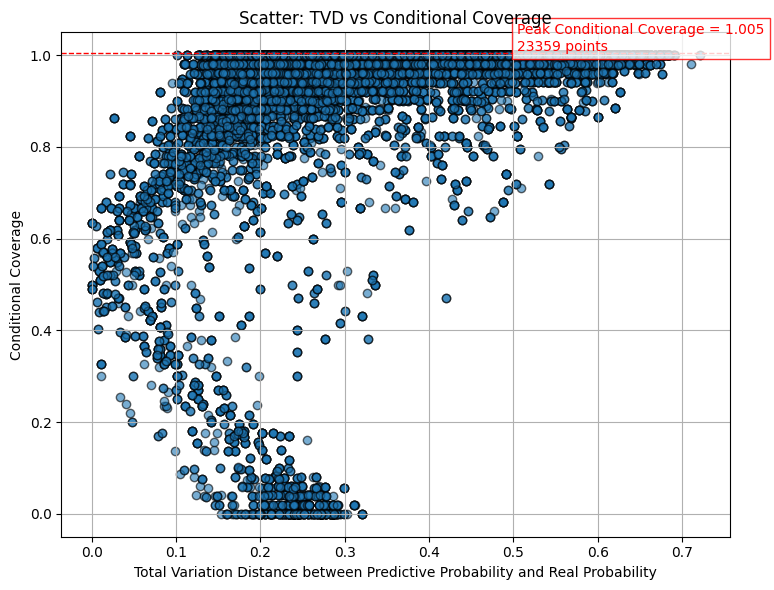

Peak Conditional Coverage = 1.005, with 23359 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.62161']
  Real Probability Set      : ['0.80392']
Sample 2:
  Predictive Probability Set: ['0.75801']
  Real Probability Set      : ['0.92000']
Sample 3:
  Predictive Probability Set: ['0.66246']
  Real Probability Set      : ['0.84314']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.51941']
  Real Probability Set      : ['0.03846']
Sample 2:
  Predictive Probability Set: ['0.57721']
  Real Probability Set      : ['0.02000']
Sample 3:
  Predictive Probability Set: ['0.57142']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.31599', '0.15554']
  Real Probability Set      : ['0.00000', '0.70588']
Sample 2:
  Predictive Probability Set: ['0.45302', '0.10190']
  Real Probability Set      :

In [7]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5267 ± 0.0028
Final Average Prediction Set Size: 1.54 ± 0.02
Final Average Coverage: 0.9469 ± 0.0030
Final Average Real Probability: 0.9194 ± 0.0035


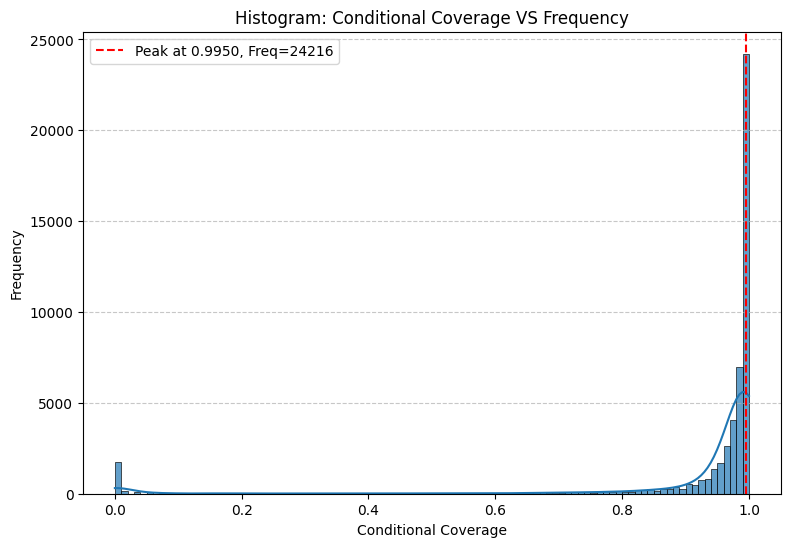

24216 (48.43%) samples reached the peak conditional coverage at 0.9950


In [5]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.01, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5267 ± 0.0028
Final Average Prediction Set Size: 1.54 ± 0.02
Final Average Coverage: 0.9469 ± 0.0030
Final Average Real Probability: 0.9194 ± 0.0035


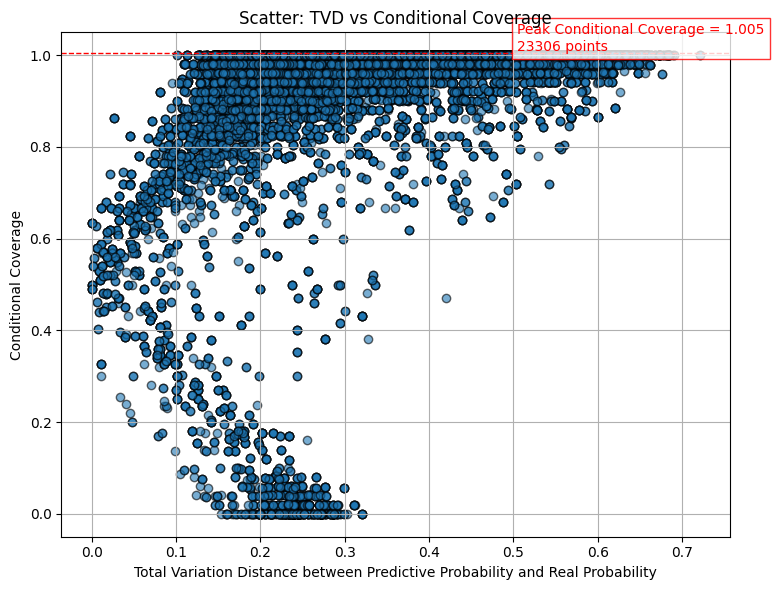

Peak Conditional Coverage = 1.005, with 23306 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.65752']
  Real Probability Set      : ['0.81250']
Sample 2:
  Predictive Probability Set: ['0.66246']
  Real Probability Set      : ['0.84314']
Sample 3:
  Predictive Probability Set: ['0.67064']
  Real Probability Set      : ['0.83673']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.42469']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.23616', '0.17250', '0.09744']
  Real Probability Set      : ['0.01961', '0.00000', '0.03922']
Sample 3:
  Predictive Probability Set: ['0.33922', '0.15170']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.35359', '0.22186']
  Real Probability Set      : ['0.00000', '0.62000']
Sample 2:
  Predictive Pro

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.01, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.2909 ± 0.1118
Final Average Prediction Set Size: 1.37 ± 0.05
Final Average Coverage: 0.9493 ± 0.0034
Final Average Real Probability: 0.9204 ± 0.0045


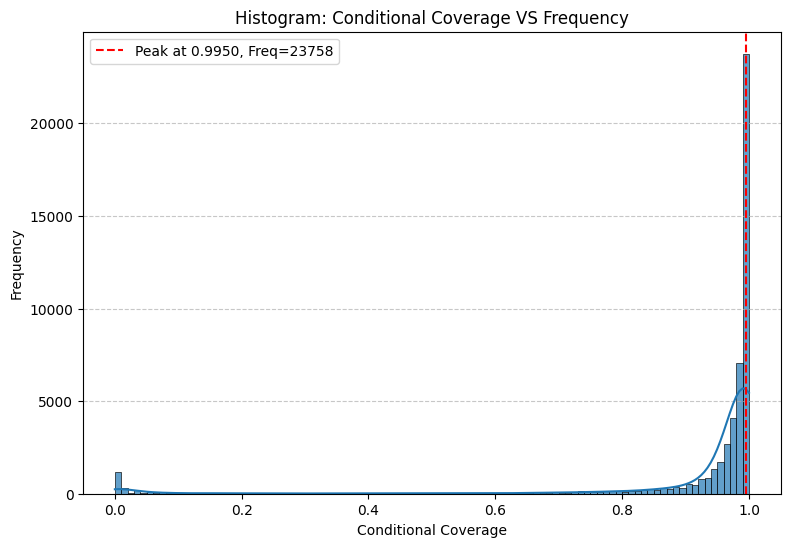

23758 (47.52%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.2909 ± 0.1118
Final Average Prediction Set Size: 1.37 ± 0.05
Final Average Coverage: 0.9493 ± 0.0034
Final Average Real Probability: 0.9204 ± 0.0045


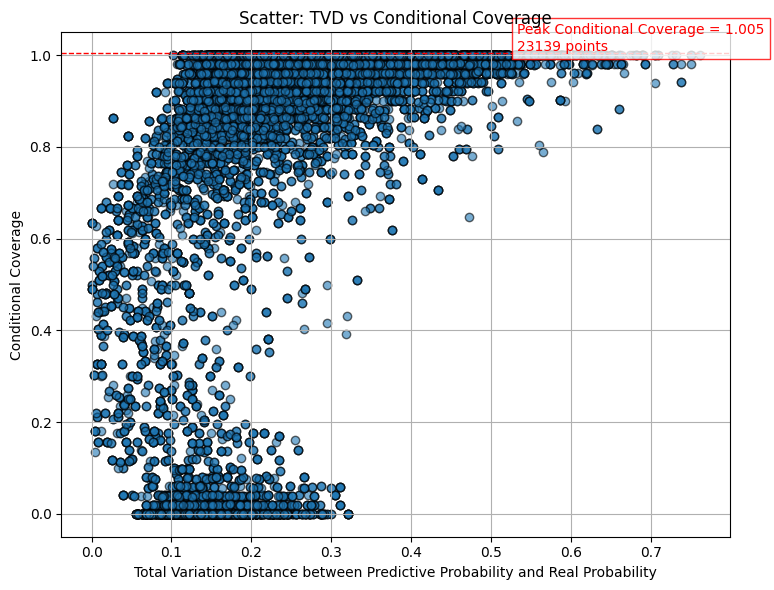

Peak Conditional Coverage = 1.005, with 23139 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.68519']
  Real Probability Set      : ['0.86000']
Sample 2:
  Predictive Probability Set: ['0.74847']
  Real Probability Set      : ['0.94000']
Sample 3:
  Predictive Probability Set: ['0.64496', '0.09068']
  Real Probability Set      : ['0.68000', '0.24000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.47217']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.55367']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.47604']
  Real Probability Set      : ['0.05882']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.15664', '0.14899']
  Real Probability Set      : ['0.01961', '0.68627']
Sample 2:
  Predictive Probability Set: ['0.16237', '0.13408']
  Real 

In [9]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)